# Kaggle競賽 : [Ghouls, Goblins, and Ghosts... Boo!](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/overview)
[資料來源](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/data)

## 比賽簡介
比賽的目的要利用怪物的特徵，將哥布林、食屍鬼以及幽靈三種怪物正確分類，一共有900隻怪物，其中371隻怪物的分類已經確定

## 資料簡介
資料一共有兩個檔案：
* train.csv - 共有6個特徵，以及1個目標欄位，共 371筆資料
* test.csv - 共有6個特徵，沒有目標欄位，共 529筆資料

## 資料特徵
* id - 怪物的編號，怪物隨機被分配到train跟test的資料集，故不連號
* bone_length - 怪物的骨頭均長，已歸一化，範圍在0～1之間
* rotting_flesh - 怪物的腐爛的百分比
* hair_length - 怪物的頭髮均長，已歸一化，範圍在0～1之間
* has_soul - 怪物的靈魂的百分比
* color - 怪物的顏色，一共有 white, black, clear, blue, green, blood 六種
* type - 目標特徵，怪物類型，一共有 Ghost, Goblin, Ghoul 三種


## 資料預處理

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [263]:
data = pd.read_csv("train.csv")
data

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,889,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


### 極端值
彙整資料的離散與集中量數

In [11]:
data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [264]:
test = pd.read_csv("test.csv")
test

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black
...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,blue
525,894,0.229161,0.601265,0.191282,0.475115,clear
526,895,0.510497,0.498347,0.708020,0.714154,white
527,898,0.331472,0.765835,0.338207,0.193431,clear


In [265]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-null    float64
 5   color          529 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


如下圖所示，經過觀察以及資料視覺化，可看出有部分特徵由離群值，但考量離群值不多，且無法藉由方法得知是否離群值是不是異常值，故不進行刪除

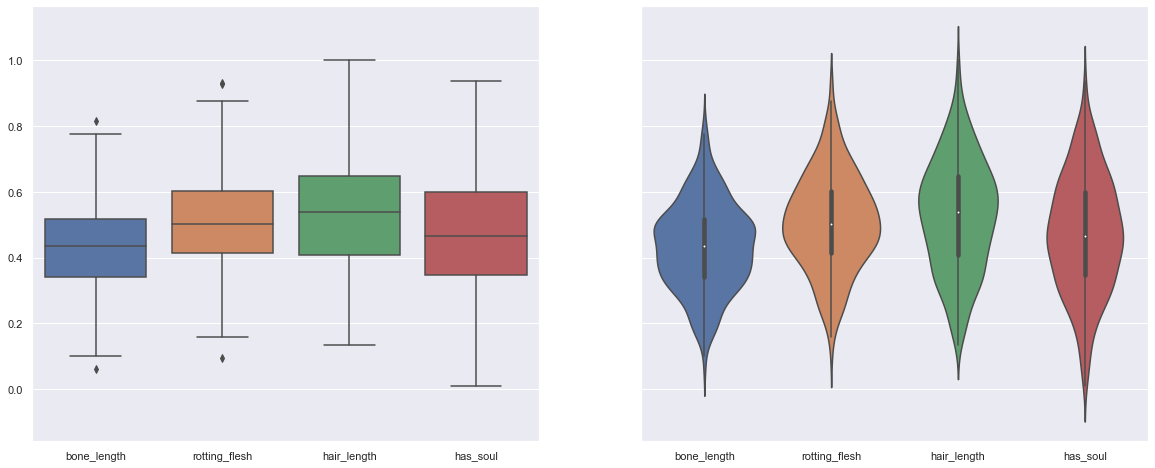

In [12]:
fig, axes = plt.subplots(1,2, sharey= True, figsize = (20,8))
sns.boxplot(ax = axes[0],data = data.iloc[:,1:5])
sns.violinplot(ax = axes[1],data = data.iloc[:,1:5])
plt.show()

## 資料平衡

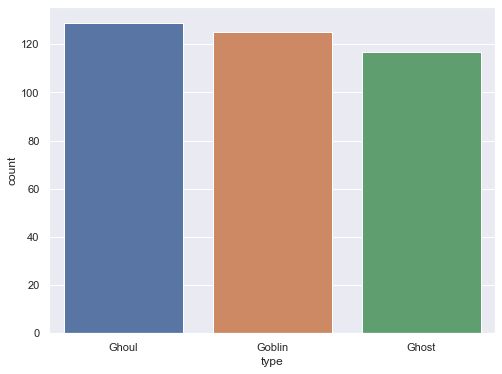

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = "type")
plt.show()

## 相關性
### type 順序 {'Ghost': 1, 'Goblin': 2, 'Ghoul': 3} 相關高


{'blue': 1, 'white': 2, 'black': 3, 'blood': 4, 'clear': 5, 'green': 6} {'Ghost': 1, 'Goblin': 2, 'Ghoul': 3}


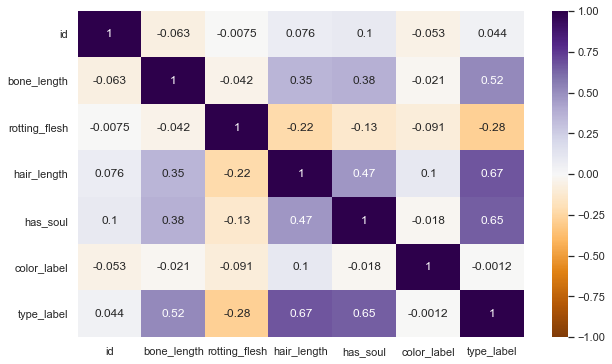

In [14]:
def label_encoding(df):
    label_list =df.unique().tolist()
    random.shuffle(label_list)
    label_dict = {i:j+1 for j,i in enumerate(label_list)}
    encoding = df.map(label_dict)
    return label_dict,encoding 
heatmap_data = data.copy()

color_dict,heatmap_data["color_label"] = label_encoding(data.color)
type_dict,heatmap_data["type_label"] = label_encoding(data.type)
print(color_dict,type_dict)
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(heatmap_data.corr(),vmin=-1, vmax=1, annot=True,cmap="PuOr")
plt.show()

['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color', 'type']


In [15]:
pairwise_data = data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color', 'type']]

## 資料分佈

### 連續型資料
此步驟將連續類型的資料進行視覺化，以直方圖與散佈圖來呈現資料的分佈情形。  
如下圖，可以發現單個特徵分佈與常態分配相似，特徵之間的散佈情況都看似無相關，除了hair_length與has_soul兩特徵，相較其他，有較明顯的相關。


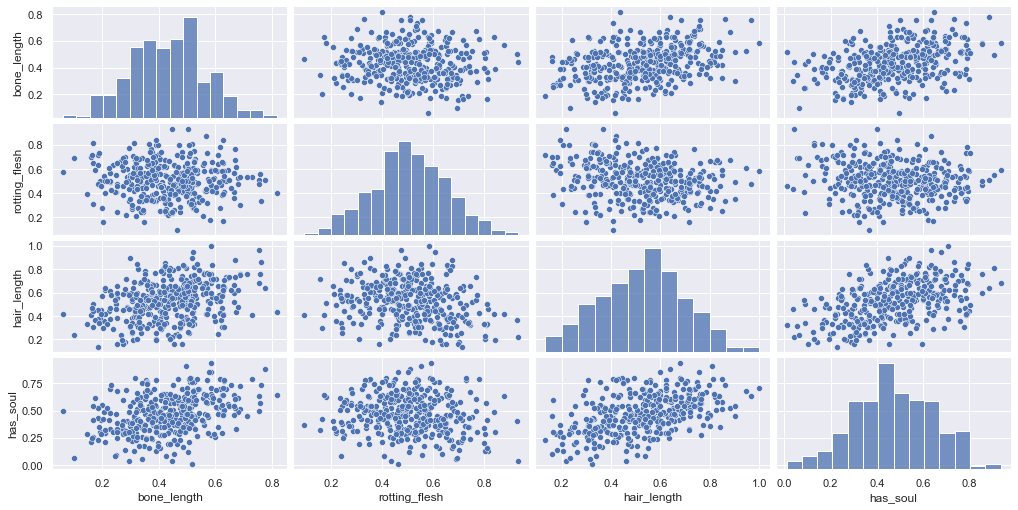

In [16]:
sns.pairplot(data = pairwise_data, height = 1.8, aspect = 2)
plt.show()

若以目標特徵進行區分，不同種類怪物的在特徵之間的散佈圖看來，無法有很明顯的區分，在單一特徵上的分佈也有很高的重疊性，如下圖所示：

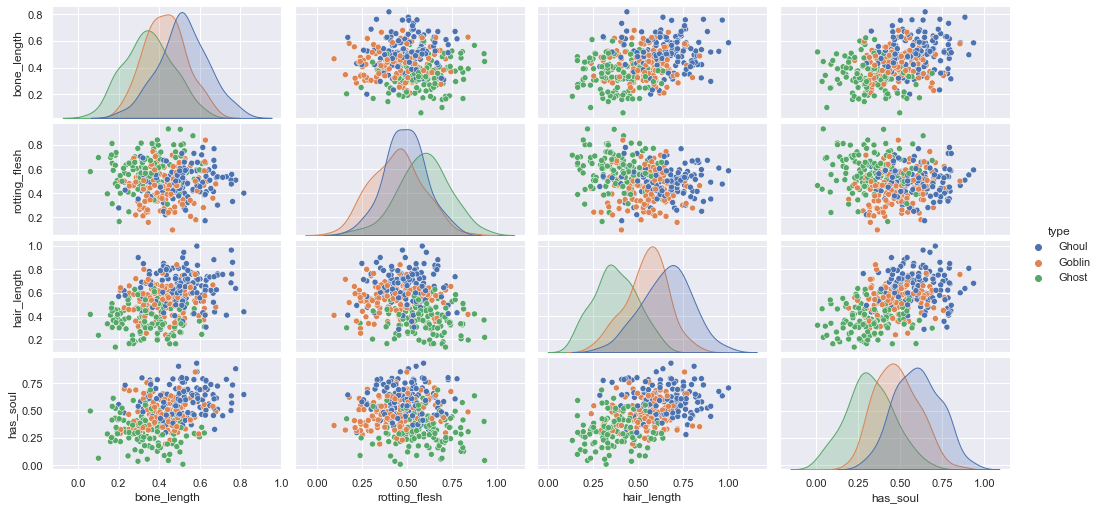

In [17]:
sns.pairplot(data = pairwise_data,hue = "type",height = 1.8, aspect = 2)
plt.show()

### 類別型資料
如下圖所示，將color的各顏色出現次數進行視覺化，從左上圖的單一特徵或者右上圖的考量目標特徵，可以發現不管有沒有將怪物分類，顏色的比例都很相近。  
左下與右下的圖，則是將顏色次數以百分比堆疊圖的方式呈現，可以更清楚的看出，顏色的比例幾乎是相同的。

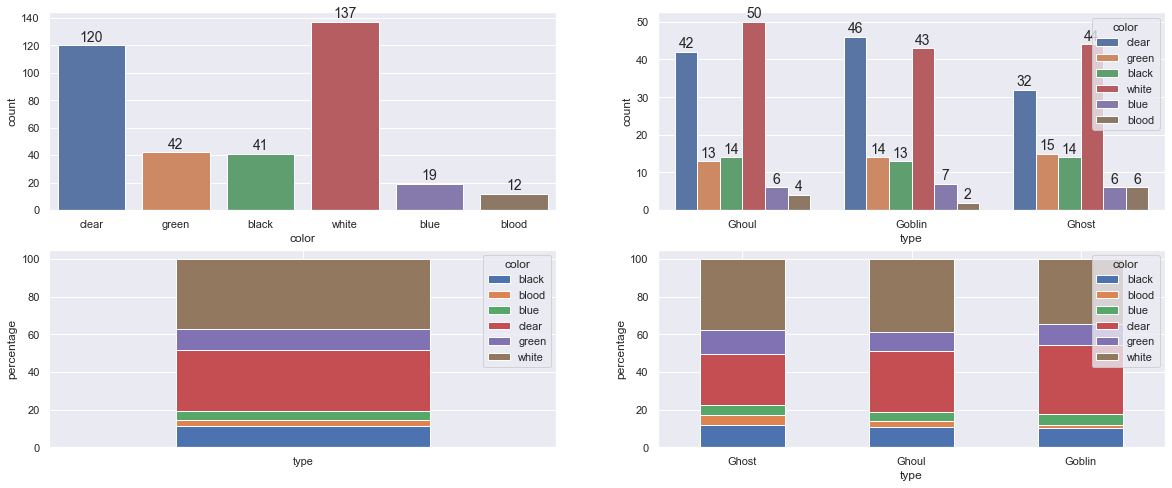

In [18]:
def annot(axes):
    for p in axes.patches:
        height = p.get_height()
        axes.annotate(f"{height}",
                xy = (p.get_x() + p.get_width() / 2, height),
                ha = 'center',
                va = 'bottom', 
                xytext = (0, 1), # distance with bar 
                textcoords = 'offset points',
                fontsize = 14)

df1 = data.groupby(["color"]).count()[["type"]]
df2 = data.pivot_table(index = "color", columns = "type", aggfunc="count")["id"]
df1 = df1.agg(lambda x: x/x.sum()*100).round(2)
df2 = df2.agg(lambda x: x/x.sum()*100).round(2)

fig, axes = plt.subplots(2,2, figsize = (20,8))
sns.countplot(ax = axes[0,0], data = data, x = "color")
sns.countplot(ax = axes[0,1], data = data, x = "type", hue = "color")
df1.T.plot.bar(ax = axes[1,0], stacked = True, rot = 0)
df2.T.plot.bar(ax = axes[1,1], stacked = True, rot = 0)
axes[1,0].set_ylabel("percentage")
axes[1,1].set_ylabel("percentage")
annot(axes[0,0])
annot(axes[0,1])
plt.show()

### Ｏne hot encoding  

在資料的六種特徵中，color為類別型資料，無法用於建立模型，需事先轉換型態，又color為名目尺度的資料型態，沒有順序之分，故使用one hot encoding而非 label encoding。  


程式碼如下，模型在預測時，資料的型態需要跟訓練資料集相同，故先合併train.csv與test.csv，進行one hot encoding後，再將其分開：


In [268]:
train = data.drop("type",axis = 1)
test = pd.read_csv("test.csv")
combine = pd.concat([train,test],axis =0,sort = False)
ohe = pd.get_dummies(combine)
X = ohe.iloc[:371]
y = data.type
test_data = ohe.iloc[371:]
display(train,X)

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,0,0.354512,0.350839,0.465761,0.781142,clear
1,1,0.575560,0.425868,0.531401,0.439899,green
2,2,0.467875,0.354330,0.811616,0.791225,black
3,4,0.776652,0.508723,0.636766,0.884464,black
4,5,0.566117,0.875862,0.418594,0.636438,green
...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue
367,889,0.331936,0.564836,0.539216,0.551471,green
368,890,0.481640,0.501147,0.496446,0.544003,clear
369,896,0.294943,0.771286,0.583503,0.300618,clear


,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,0,0,1,0,0,0
367,889,0.331936,0.564836,0.539216,0.551471,0,0,0,0,1,0
368,890,0.481640,0.501147,0.496446,0.544003,0,0,0,1,0,0
369,896,0.294943,0.771286,0.583503,0.300618,0,0,0,1,0,0


In [269]:
ohe1 = ohe.drop("id",axis=1)
ohe1["id_"] = ohe["id"].map(lambda x: np.prod([int(i) for i in str(x)]))
X_1 = ohe1.iloc[:371]
test_data_1 = ohe1.iloc[371:]

In [270]:
from sklearn.model_selection import cross_val_score,cross_val_predict
def K_fold(model,X,y):
    scores = cross_val_score(model, X, y, cv = 10, scoring = "accuracy",n_jobs = -1)
    k_fold = scores.mean()
    return k_fold 

## 建立模型

作業的目的為正確怪物的類型，此目標特徵為類別資料，故在模型的演算法挑選為分類模型。  
以下四種演算法為作業中所使用的方法：
* Decision Tree
* Logistic Regression
* Random Forest
* Catboost

### Decision Tree 決策樹
參數：
* min_samples_split – 用於限制樹的分類，在節點的樣本數低於參數設定時，就不會繼續分類
* max_depth – 限制樹的深度，避免overfitting


In [273]:
from sklearn.tree import DecisionTreeClassifier as Tree

Dtree = Tree()
Dtree1 = Tree(min_samples_split=10,max_depth=5)
Dtree2 = Tree(max_depth=5)
print("Dtree",K_fold(Dtree,X,y))
print("Dtree1",K_fold(Dtree1,X,y))
print("Dtree2",K_fold(Dtree2,X_1,y))


Dtree 0.6258179231863443
Dtree1 0.6934566145092461
Dtree2 0.6876244665718351


In [272]:
Dtree.fit(X,y)
pred_type = Dtree.predict(test_data)
test["type"] = pred_type
submit = test[["id","type"]]
submit.to_csv("Dtree.csv",index = False)


In [24]:
Dtree1.fit(X_1,y)
pred_type = Dtree1.predict(test_data_1)
test["type"] = pred_type
submit = test[["id","type"]]
submit.to_csv("Dtree1.csv",index = False)

In [25]:
Dtree2.fit(X_1,y)
pred_type = Dtree2.predict(test_data_1)
test["type"] = pred_type
submit = test[["id","type"]]
submit.to_csv("Dtree2_1.csv",index = False)

#### esemble Decision Tree
嘗試合併多個決策樹的結果

In [26]:
pred = pd.read_csv("Dtree.csv").type.rename("DTree")
pred1 = pd.read_csv("Dtree1.csv").type.rename("DTree1")
pred2 = pd.read_csv("Dtree2.csv").type.rename("DTree2")

In [27]:
esm = pd.concat([pred,pred1],axis =1)
esm = pd.concat([esm,pred2],axis =1)

In [28]:
from collections import Counter

In [29]:
esm_DT = esm.agg(lambda x:Counter(x).most_common(1)[0][0],axis =1)
test["type"] = esm_DT
submit = test[["id","type"]]
submit.to_csv("esm_DT.csv",index = False)

最佳參數：  
Tree(min_samples_split=10,max_depth=5)

準確率：  
線下：0.693  
上傳：0.66918

小結：  
整個調參過程還包含了對id進行特徵工程，將id的每個位數相乘後當作特徵，不過沒什麼改善，另外還將三次調參的結果以多數決的方式esemble，結果亦低於最佳參數。

<br/>


### PyCaret 調參的輔助工具
PyCaret可以用來找到模型的最佳參數，減少手動調參

In [30]:
from pycaret.classification import *

In [31]:
exp = setup(data = data, target = "type") 

,Description,Value
0,session_id,3704
1,Target,type
2,Target Type,Multiclass
3,Label Encoded,"Ghost: 0, Ghoul: 1, Goblin: 2"
4,Original Data,"(371, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7298,0.8794,0.7199,0.7302,0.7215,0.5922,0.5986,1.5780
lda,Linear Discriminant Analysis,0.7262,0.9017,0.7201,0.7290,0.7242,0.5882,0.5910,0.0080
rf,Random Forest Classifier,0.7260,0.8783,0.7159,0.7295,0.7204,0.5867,0.5928,0.1870
xgboost,Extreme Gradient Boosting,0.7143,0.8664,0.7056,0.7222,0.7039,0.5695,0.5786,0.6350
lr,Logistic Regression,0.7108,0.8794,0.6978,0.7013,0.6937,0.5620,0.5711,0.2250
ada,Ada Boost Classifier,0.7066,0.8526,0.7033,0.7287,0.7054,0.5598,0.5703,0.0410
lightgbm,Light Gradient Boosting Machine,0.6951,0.8622,0.6867,0.6998,0.6885,0.5406,0.5470,0.7620
gbc,Gradient Boosting Classifier,0.6914,0.8541,0.6814,0.6904,0.6814,0.5350,0.5418,0.0960
ridge,Ridge Classifier,0.6872,0.0000,0.6665,0.6733,0.6428,0.5232,0.5473,0.0090
et,Extra Trees Classifier,0.6797,0.8763,0.6703,0.6800,0.6721,0.5173,0.5230,0.1860


### Logistic Regression 羅傑斯迴歸

In [41]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6538,0.8297,0.6435,0.6472,0.6394,0.4765,0.4842
1,0.6538,0.8908,0.6343,0.6186,0.5902,0.4730,0.5065
2,0.7308,0.8499,0.7222,0.7220,0.7248,0.5947,0.5960
3,0.6923,0.8439,0.6852,0.7056,0.6849,0.5347,0.5433
4,0.7692,0.8997,0.7546,0.7657,0.7423,0.6502,0.6687
5,0.5385,0.8144,0.5231,0.4864,0.5064,0.3020,0.3069
6,0.7692,0.8849,0.7593,0.7590,0.7588,0.6518,0.6562
7,0.8077,0.9736,0.8009,0.8159,0.8044,0.7098,0.7163
8,0.6923,0.8773,0.6725,0.6923,0.6923,0.5336,0.5336
9,0.8000,0.9301,0.7821,0.8002,0.7931,0.6936,0.6989


In [43]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6923,0.8616,0.6898,0.7163,0.7004,0.5398,0.5434
1,0.6538,0.9105,0.6389,0.6203,0.6285,0.4765,0.4842
2,0.6923,0.8866,0.6898,0.7163,0.7004,0.5398,0.5434
3,0.7692,0.8722,0.7685,0.7788,0.7683,0.6541,0.6585
4,0.8077,0.9388,0.8056,0.8205,0.8122,0.7118,0.7133
5,0.6538,0.8097,0.6481,0.6609,0.6526,0.4812,0.4844
6,0.7692,0.8973,0.7685,0.7890,0.7724,0.6549,0.6607
7,0.8846,0.9648,0.8796,0.8868,0.8838,0.8263,0.8281
8,0.6154,0.8730,0.6021,0.6490,0.6289,0.4235,0.4263
9,0.8000,0.9392,0.7964,0.8044,0.8004,0.6981,0.6998


In [44]:
print(tuned_lr)

LogisticRegression(C=6.313, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=3704, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)


In [132]:
from sklearn.linear_model import LogisticRegression
ohe = pd.get_dummies(combine,drop_first=True)
X_lr = ohe.iloc[:371]
y_lr = data.type
test_data_lr = ohe.iloc[371:]

In [47]:
lr = LogisticRegression()
print("lr",K_fold(lr,X,y))

lr 0.6984352773826459


In [95]:
lr1 = LogisticRegression(C=6.313, class_weight='balanced',
                   max_iter=1000, n_jobs= -1,
                   penalty='none', random_state=3704)
print("lr1",K_fold(lr1,X,y))

lr1 0.709317211948791


In [133]:
lr2 = LogisticRegression(C=6, class_weight='balanced', n_jobs= -1,max_iter=1000,
                   penalty='l2', random_state=3704, solver='newton-cg')
print("lr2",K_fold(lr2,X,y))
print("lr2_1",K_fold(lr2,X_lr,y_lr))

lr2 0.714651493598862
lr2_1 0.7119487908961595


In [85]:
def pred(model,pred_y,save = False):
    pred = model.predict(pred_y)
    test["type"] = pred
    submit = test[["id","type"]]
    if save:
        submit.to_csv(f"{save}.csv",index = False)

In [51]:
lr.fit(X,y)
pred(lr,test_data,save = "lr")

In [62]:
lr1.fit(X,y)
pred(lr1,test_data,save = "lr1")

In [129]:
lr2.fit(X,y)
pred(lr2,test_data,save = "lr2")

In [134]:
lr2.fit(X_lr,y_lr)
pred(lr2,test_data_lr,save = "lr2_1")

最佳參數：  
```
LogisticRegression(C=6, class_weight='balanced',
                   n_jobs= -1, max_iter=1000, penalty='l2', random_state=3704,
                   solver='newton-cg')
```
準確率：  
線下：0.7146  
上傳：0.73724  

小結：  
Pycaret的最佳參數並沒有優於手動調參的結果，不過是一個很好參考的基準，在one hot encoding有比較有沒有drop first的結果，在線下的準確率有差異，但上傳的準確率是一樣的。

<br/>


### RandomForest 隨機森林

In [135]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6538,0.8449,0.6481,0.6538,0.6538,0.4800,0.4800
1,0.7308,0.8612,0.7176,0.7133,0.7104,0.5928,0.6024
2,0.7308,0.8996,0.7269,0.7431,0.7353,0.5965,0.5978
3,0.6923,0.8579,0.6852,0.6876,0.6835,0.5357,0.5406
4,0.7692,0.8859,0.7639,0.7692,0.7692,0.6533,0.6533
5,0.5769,0.7874,0.5741,0.5769,0.5729,0.3659,0.3683
6,0.7692,0.8986,0.7593,0.7646,0.7604,0.6518,0.6577
7,0.8462,0.9955,0.8333,0.8935,0.8345,0.7668,0.7962
8,0.7308,0.8701,0.7164,0.7452,0.7363,0.5938,0.5951
9,0.7600,0.8820,0.7345,0.7480,0.7473,0.6305,0.6370


In [136]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6154,0.8533,0.6111,0.6271,0.6199,0.4235,0.4244
1,0.6923,0.8729,0.6759,0.6573,0.6564,0.5336,0.5488
2,0.6923,0.8644,0.6898,0.7163,0.7004,0.5398,0.5434
3,0.6538,0.8831,0.6435,0.6441,0.6376,0.4765,0.4842
4,0.8077,0.8988,0.8009,0.8044,0.8043,0.7105,0.7121
5,0.5385,0.8127,0.5324,0.5335,0.5308,0.3067,0.3094
6,0.8077,0.9299,0.8009,0.8044,0.8043,0.7105,0.7121
7,0.9231,0.9822,0.9167,0.9371,0.9214,0.8839,0.8920
8,0.6923,0.8792,0.6725,0.6923,0.6923,0.5336,0.5336
9,0.8000,0.9009,0.7821,0.7939,0.7952,0.6944,0.6961


In [145]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3704, verbose=0,
                       warm_start=False)


In [137]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=-1, oob_score=False, random_state=3704, verbose=0,
                       warm_start=False)


In [140]:
from sklearn.ensemble import RandomForestClassifier
pycaret_rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,n_estimators=160,
                       n_jobs=-1, random_state=3704)
print("pycaret_rf",K_fold(pycaret_rf,X,y))

pycaret_rf 0.6955903271692746


In [141]:
pycaret_rf.fit(X,y)
pred(pycaret_rf,test_data,save = "pycaret_rf")

In [185]:
rf1 = RandomForestClassifier(bootstrap=True, class_weight= None,
                       criterion='gini', max_depth= 10, max_features='auto',
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,n_estimators=500,
                       n_jobs=-1, random_state=3704)
print("rf1",K_fold(rf1,X,y))

rf1 0.7305832147937411


In [182]:
rf1.fit(X,y)
pred(rf1,test_data,save = "rf1")

最佳參數：  
```
RandomForestClassifier(bootstrap=True, class_weight= None,  
                       criterion='gini', max_depth= 10, 
                       max_features='auto', min_impurity_decrease=0.0, 
                       min_impurity_split=None,min_samples_leaf=10, 
                       min_samples_split=9,n_estimators=500,
                       n_jobs=-1, random_state=3704)
```
準確率：  
線下：0.73058  
上傳：0.73156

小結：  
在此資料集，Decision Tree與 Random Forest使用gini的表現優於 entropy，且限制節點切分以及樹深都對於準確率的上升有幫助。

<br/>


### CatBoost
Catboost 的Cat是由 catergory的縮寫而來的，它是與xgboost以及lightgbm齊名的超強模型。  
其獨特之處為資料無需進行one hot encoding的資料轉換，並且在 [官方文件](https://catboost.ai/docs/concepts/parameter-tuning.html) 上就開宗明義的表示
> Do not use one-hot encoding during preprocessing. This affects both the traning speed and the resulting quality.  

因此在catboost的模型中，使用原始的資料型態進行訓練。

In [235]:
from catboost import Pool, CatBoostClassifier

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data.type, test_size=0.2, random_state=238)

In [229]:
cb = CatBoostClassifier(eval_metric = "AUC",
                        loss_function="MultiClass",
                        random_seed = 3704,
                        max_depth = 7,
                        iterations = 5000,
                        learning_rate = 0.1,
                        early_stopping_rounds = 500,
                        cat_features = [5])

In [230]:
cb.fit(X_train,y_train)

0:	total: 2.83ms	remaining: 14.2s
1:	total: 8.73ms	remaining: 21.8s
2:	total: 14.2ms	remaining: 23.7s
3:	total: 20.9ms	remaining: 26.1s
4:	total: 25.2ms	remaining: 25.2s
5:	total: 31.2ms	remaining: 26s
6:	total: 36.5ms	remaining: 26s
7:	total: 41.9ms	remaining: 26.1s
8:	total: 47.9ms	remaining: 26.5s
9:	total: 50.8ms	remaining: 25.4s
10:	total: 56.1ms	remaining: 25.4s
11:	total: 61.7ms	remaining: 25.6s
12:	total: 66.9ms	remaining: 25.7s
13:	total: 73.5ms	remaining: 26.2s
14:	total: 78.9ms	remaining: 26.2s
15:	total: 84.6ms	remaining: 26.3s
16:	total: 90.6ms	remaining: 26.5s
17:	total: 96ms	remaining: 26.6s
18:	total: 102ms	remaining: 26.7s
19:	total: 107ms	remaining: 26.7s
20:	total: 113ms	remaining: 26.9s
21:	total: 119ms	remaining: 27s
22:	total: 128ms	remaining: 27.6s
23:	total: 134ms	remaining: 27.7s
24:	total: 140ms	remaining: 27.8s
25:	total: 146ms	remaining: 27.9s
26:	total: 150ms	remaining: 27.5s
27:	total: 156ms	remaining: 27.7s
28:	total: 161ms	remaining: 27.6s
29:	total: 165

In [231]:
cb.score(X_test,y_test)

0.7333333333333333

In [242]:
test = pd.read_csv("test.csv")
pred(cb,test,save = "cb")

In [243]:
cb1 = CatBoostClassifier(eval_metric = "Accuracy",
                        loss_function="MultiClass",
                        random_seed = 3704,
                        max_depth = 7,
                        iterations = 5000,
                        learning_rate = 0.01,
                        early_stopping_rounds = 500,
                        cat_features = [5])
cb1.fit(X_train,y_train)

0:	learn: 0.6756757	total: 5.05ms	remaining: 25.3s
1:	learn: 0.6824324	total: 10.6ms	remaining: 26.5s
2:	learn: 0.7229730	total: 17.2ms	remaining: 28.6s
3:	learn: 0.7635135	total: 22.8ms	remaining: 28.4s
4:	learn: 0.7297297	total: 25.8ms	remaining: 25.8s
5:	learn: 0.7668919	total: 30.6ms	remaining: 25.5s
6:	learn: 0.7837838	total: 36.2ms	remaining: 25.8s
7:	learn: 0.7871622	total: 41.2ms	remaining: 25.7s
8:	learn: 0.7871622	total: 45.8ms	remaining: 25.4s
9:	learn: 0.7939189	total: 50.1ms	remaining: 25s
10:	learn: 0.7804054	total: 53.2ms	remaining: 24.1s
11:	learn: 0.7871622	total: 59.3ms	remaining: 24.6s
12:	learn: 0.8040541	total: 63.6ms	remaining: 24.4s
13:	learn: 0.7939189	total: 67.6ms	remaining: 24.1s
14:	learn: 0.7972973	total: 72.5ms	remaining: 24.1s
15:	learn: 0.7972973	total: 77.2ms	remaining: 24s
16:	learn: 0.7972973	total: 81ms	remaining: 23.8s
17:	learn: 0.7837838	total: 85.6ms	remaining: 23.7s
18:	learn: 0.7905405	total: 90.2ms	remaining: 23.6s
19:	learn: 0.7837838	total: 

In [244]:
cb1.score(X_test,y_test)

0.72

In [245]:
test = pd.read_csv("test.csv")
pred(cb1,test,save = "cb1")

In [257]:
catboost = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6923,0.8399,0.6806,0.6818,0.6819,0.5357,0.5406
1,0.6538,0.8670,0.6389,0.6259,0.6218,0.4753,0.4888
2,0.7308,0.8643,0.7315,0.7471,0.7345,0.5973,0.6013
3,0.6923,0.8782,0.6806,0.7096,0.6761,0.5336,0.5501
4,0.7308,0.9031,0.7269,0.7297,0.7253,0.5965,0.6005
5,0.5385,0.7376,0.5324,0.5335,0.5308,0.3067,0.3094
6,0.8077,0.8997,0.8056,0.8157,0.8100,0.7118,0.7133
7,0.8846,0.9979,0.8750,0.9024,0.8762,0.8255,0.8389
8,0.8077,0.8988,0.7868,0.8019,0.8030,0.7065,0.7082
9,0.7600,0.9077,0.7405,0.7539,0.7552,0.6333,0.6348


In [259]:
catboost.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'use_best_model': False,
 'class_names': [0, 1, 2],
 'random_seed': 3704,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'MultiClass',
 'learning_rate': 0.07385899871587753,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,


In [260]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7308,0.8752,0.7269,0.7375,0.7324,0.5956,0.5969
1,0.6923,0.8715,0.6806,0.6731,0.6784,0.5357,0.5394
2,0.5769,0.8320,0.5648,0.5648,0.5699,0.3630,0.3638
3,0.7308,0.8917,0.7222,0.7797,0.7244,0.5919,0.6087
4,0.8462,0.9056,0.8380,0.8449,0.8392,0.7679,0.7731
5,0.5769,0.7729,0.5694,0.5685,0.5690,0.3630,0.3655
6,0.7692,0.9193,0.7639,0.7692,0.7692,0.6533,0.6533
7,0.8846,0.9911,0.8750,0.9135,0.8795,0.8255,0.8428
8,0.6923,0.8878,0.6688,0.6980,0.6935,0.5326,0.5338
9,0.7600,0.8925,0.7405,0.7539,0.7552,0.6333,0.6348


最佳參數：
```
CatBoostClassifier(eval_metric = "AUC",
                   loss_function="MultiClass",
                   random_seed = 3704,
                   max_depth = 7,
                   iterations = 5000,
                   learning_rate = 0.1,
                   early_stopping_rounds = 500,
                   cat_features = [5])
```

準確率：  
線下：0.73333  
上傳：0.71644

小結：  
Pycaret在catboost的最佳參數中，有些參數無法在官方文件查到，雖然Pycaret的結果較好，但以手動調參為主。


## 總結
四個演算法中，準確率最高的是Logistic Regression，第二則是 Random Forest
